In [ ]:
import pandas as pd
import numpy as np
import math
import array as arr

In [ ]:
cy=[0 for x in range(100)]
cx=[0 for x in range(100)]
dx=[0 for x in range(100)]
dy=[0 for x in range(100)]
for i in range(100):
  cy.append (math.atan(i-20))
  cx.append(i)
  dy.append(math.log(pow(2.71828,i-20),10))
  dx.append(i)

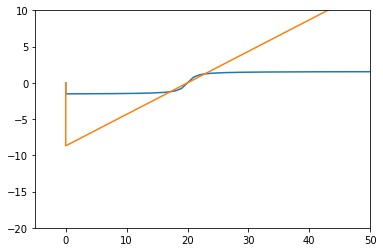

In [ ]:
import matplotlib.pyplot as plt
plt.ylim(-20,10)
plt.xlim(-5,50)
plt.plot(cx,cy)
plt.plot(dx,dy)
plt.show()

In [ ]:
feature1 = np.column_stack([cx, cy, np.array([0.0 for i in range(len(cx))])])
feature2 = np.column_stack([dx, dy, np.array([1.0 for i in range(len(cx))])])
data = np.row_stack([feature1, feature2])
data

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [97.        , 33.44065261,  1.        ],
       [98.        , 33.8749468 ,  1.        ],
       [99.        , 34.30924099,  1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(data,test_size=0.2)

In [ ]:
print (test)

[[ 0.          0.          1.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 5.         -6.51441285  1.        ]
 [72.         22.58329787  1.        ]
 [ 0.          0.          0.        ]
 [76.         24.32047463  1.        ]
 [14.         -2.60576514  1.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          1.        ]
 [80.          1.5541312   0.        ]
 [74.         23.45188625  1.        ]
 [ 0.          0.          1.        ]
 [ 0.          0.          1.        ]
 [ 0.          0.          1.        ]
 [31.          4.77723609  1.        ]
 [48.          1.53509721  0.        ]
 [ 0.          0.          0.        ]
 [57.          1.54377588  0.        ]
 [ 0.          0.          0.        ]
 [47.         11.72594312  1.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          1.        ]
 [82.         26.92623977  1.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.        

In [ ]:
X_train= train.T[:2].T
Y_train= train.T[-1].T
X_test= train.T[:2].T
Y_test= train.T[-1].T

In [ ]:
from sklearn import svm
clf= svm.SVC(kernel = "sigmoid",gamma = "auto")
clf.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.predict(X_test)

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1.

In [ ]:
from sklearn import metrics
Y_pred=clf.predict(X_test)
score1=metrics.accuracy_score(Y_test,Y_pred)
print("accuracy:  %0.3f" %score1)
#making the confusion matrix to see how many incorrect values are there
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test,Y_pred)
print(cm1)

accuracy:  0.319
[[ 95  71]
 [147   7]]


Text(0.5, 1.0, 'Confusion Matrix')

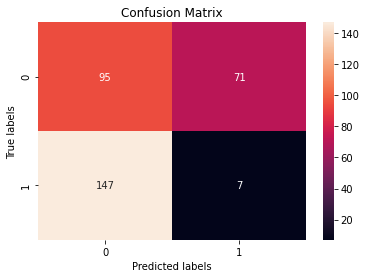

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax, fmt='g') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
clf= svm.SVC(kernel = "linear",gamma = "auto")
clf.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred=clf.predict(X_test)
score1=metrics.accuracy_score(Y_test,Y_pred)
print("accuracy:  %0.3f" %score1)
#making the confusion matrix to see how many incorrect values are there
cm1=confusion_matrix(Y_test,Y_pred)
print(cm1)

accuracy:  0.684
[[166   0]
 [101  53]]


Text(0.5, 1.0, 'Confusion Matrix')

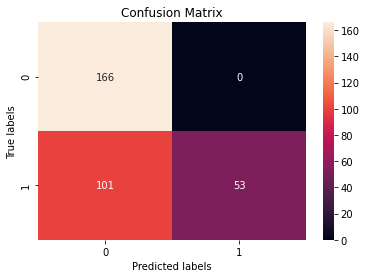

In [ ]:
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax, fmt='g') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
clf= svm.SVC(kernel = "rbf",gamma = "auto")
clf.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred=clf.predict(X_test)
score1=metrics.accuracy_score(Y_test,Y_pred)
print("accuracy:  %0.3f" %score1)
#making the confusion matrix to see how many incorrect values are there
cm1=confusion_matrix(Y_test,Y_pred)
print(cm1)

accuracy:  0.753
[[164   2]
 [ 77  77]]


Text(0.5, 1.0, 'Confusion Matrix')

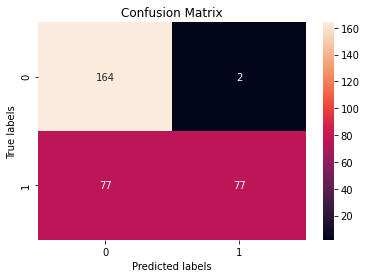

In [ ]:
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax, fmt='g') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')